##**GW150914 Characteristics:**

Nature: Black hole binary systemS.

Mass1: 36(+5,-4) $M_{\odot}%s$

Mass2: 29(+4,-4) $M_{\odot}%s$

Distance from Earth: 410 Mpc

**Note**:

  Mpc = Megaparsecs

  $M_{\odot}%s$= Solar Mas

 1 solar mass = mass of our son

 1 Mpc = 3261563.7769443 Light years

In [1]:
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 185.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 126.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 132.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 55.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 139.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 165.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 180.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting r

### Creating a simulated Gravitational wave:

We will be using Waveform approximate method, i.e: **'SEOBNRv4_opt'** model to created our simulated signal. After some manipulations and filtering, This signal is supposed to later mimic the chirping peak of our merger system and help us extract the chirping peak signal successfully from the raw data Detected by LIGO. These can be generated as a time series using **`get_td_waveform`**.


Theories behind 'SEOBNRv4_opt' model:

The **SEOBNRv4_opt** model is firmly grounded in Einstein's theory of general relativity, providing a mathematical framework to describe the gravitational wave emissions from binary black hole mergers based on the principles established by Einstein. General relativity predicts the existence of gravitational waves as ripples in spacetime caused by accelerating masses. The model incorporates the Effective-One-Body (EOB) formalism, which is a theoretical approach to solving Einstein's field equations for binary systems by combining analytical insights with numerical relativity simulations. The post-Newtonian expansions used in the model are derived from general relativity, representing a perturbative series that approximates the dynamics of the binary system. Since the mathematical theories behind the model is out of this paper scope, we won't be diving deeply into the detailed equations behind it, but it is important for us to note that in order to benifit from the model we have to take into account the models key parameters behind the simulation:

Our key Parameters are:

1) **Masses** of the binary (in solar masses)

2) The **time** between samples (in seconds)

3) The starting gravitational-wave **frequency** (Hz)

4) Name of the approximant we'd like to generate, in this case **'SEOBNRv4_opt'**.

 The implementation of the model introduced can be found [in this paper](https://arxiv.org/pdf/1611.03703.pdf). It models the gravitational waveform of inspiralling and merging black holes, and includes the ability for each black hole to spin in the same direction as the orbit (Cohered spin).

 When simulating the waveform, the model produces two types of polarized waves: plus polarization and cross polarization.

 The plus polarization represents the stretching and squeezing of spacetime along the axes perpendicular to the direction of propagation of the gravitational wave.

  While the cross polarization represents the stretching and squeezing of spacetime along the axes at a 45-degree angle to the direction of propagation of the gravitational wave.

  We will only be taking the plus polarization for the simulation but we will visualize the differnce between them breifly

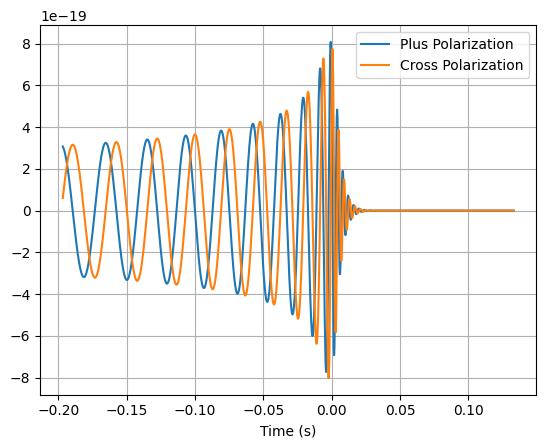

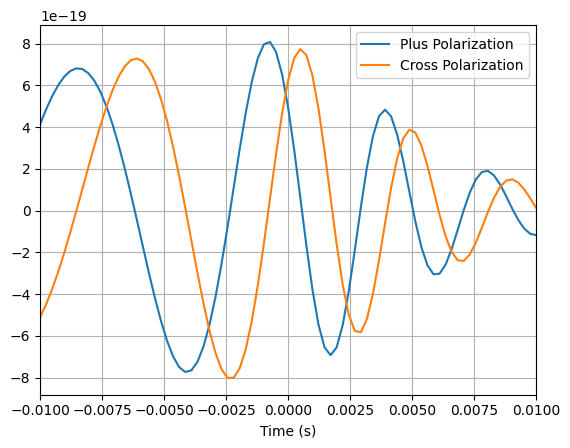

In [4]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

w_plus, w_cross = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=40,
                         mass2=30,
                         delta_t=1.0/4096,
                         f_lower=30)


pylab.plot(w_plus.sample_times, w_plus, label='Plus Polarization')
pylab.plot(w_plus.sample_times, w_cross, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.grid()
pylab.show()


# Zoom in near the merger time#

pylab.plot(w_plus.sample_times, w_plus, label='Plus Polarization')
pylab.plot(w_plus.sample_times, w_cross, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

Here,the two polariations differ only by the phase of the signal. In the zoom-in plot, we can see the merger itself and the ringdown that follows.

### Effect of Mass on the waveforms simulated:

below we will fix all the prameters except for masses and explore how the the wave grenerated by our model is affected by the masses of each of the binary component of the system.

**observations:** We'll see how the length of the waveform increases for lower mass binary mergers.

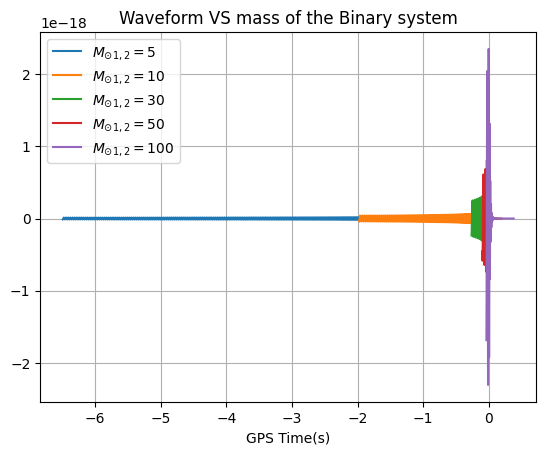

In [6]:
masses=[5,10,30,50,100]
for i in masses:
    w_plus, w_cross = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=i,
                         mass2=i,
                         delta_t=1.0/4096,
                         f_lower=30)

    pylab.plot(w_plus.sample_times, w_plus, label='$M_{\odot 1,2}=%s$' % i)

pylab.legend()
pylab.grid()
pylab.title('Waveform VS mass of the Binary system')
pylab.xlabel('GPS Time(s)')
pylab.show()

### Effect of distance on the waveforms simulated:

below we will explore how the wave grenerated by our model is affected by the  binary system distance from Earth. The units used are Megaparsecs and no red shift effects are taken into consideration.

**observation**: We can see that as the distance increases, the waveform strains' magnitude detected decreases and vice versa. This should be of no surprise to us, as our analysis of the two previously studied systems GW190814 and GW170817 have also shown a similar behavior( More massive binary system with farther distance showed a similar wave magnitude detection as a smaller in mass binary system that is closer in distance to Earth).

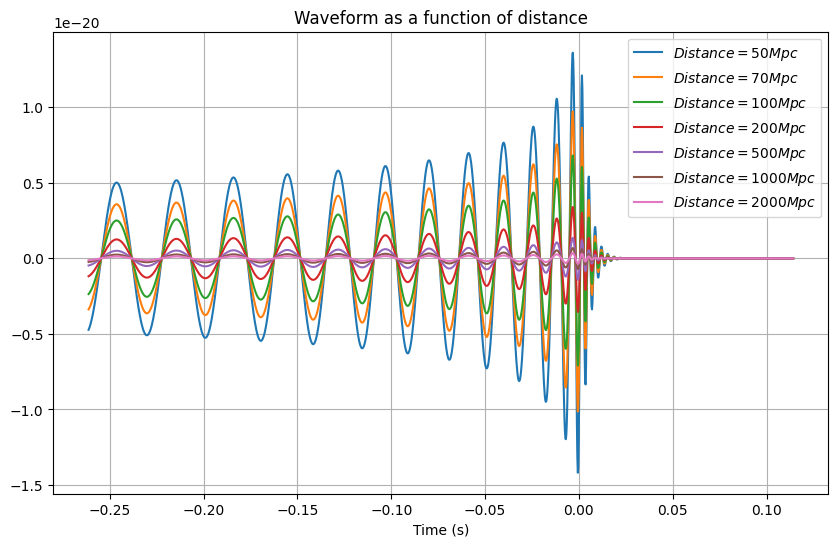

In [8]:
pylab.figure(figsize=[10, 6])
for d in [50,70,100,200, 500,1000,2000]:
    w_plus, w_cross = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=d)

    pylab.plot(w_plus.sample_times, w_plus, label='$Distance=%sMpc$' % d)


pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.title('Waveform as a function of distance')
pylab.show()

## **Matched Filtering**

Matched filtering is a signal processing technique employed in gravitational wave astronomy to detect weak signals burried in noise. It involves correlating a known simulated waveform, representing the expected signal, with the data obtained from a gravitational wave detector. The correlation process produces a signal-to-noise ratio (SNR) time series, where peaks above a specified threshold indicate the presence of a signal. By maximizing the SNR when the template aligns with the true signal, matched filtering enhances the sensitivity of detectors and facilitates the identification and characterization of gravitational wave events.

As usual, we will start by doing some cleaning and filtering our data and the later simulated signal created. The purpose of this is to reduce the dynamic range of the data and  supress low freqeuncy behavior which can introduce numerical artefacts.

# **Filtering the data**



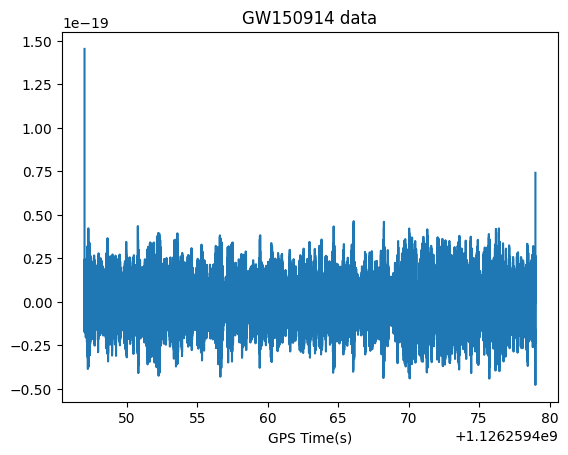

In [11]:
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass

merger_system = Merger("GW150914")

# Get the data from the Hanford detector
strain_data = merger_system.strain('H1')

# Remove the low frequency content and downsample the data to 2048Hz
strain_data = resample_to_delta_t(highpass(strain_data, 15.0), 1.0/2048)

pylab.plot(strain_data.sample_times, strain_data)
pylab.xlabel('GPS Time(s)')
pylab.title('GW150914 data')
pylab.show()


# GW150914
# GW151226

#### filter wraparound

due to highpass filtering and resampling, spikes at the boundaries of our data have been generated. To avoid this we trim the ends of the data sufficiently to ensure that they do not wraparound the input. We will enforce this requirement in all steps of our filtering, and this shall have no impact on the accuracy of our model.

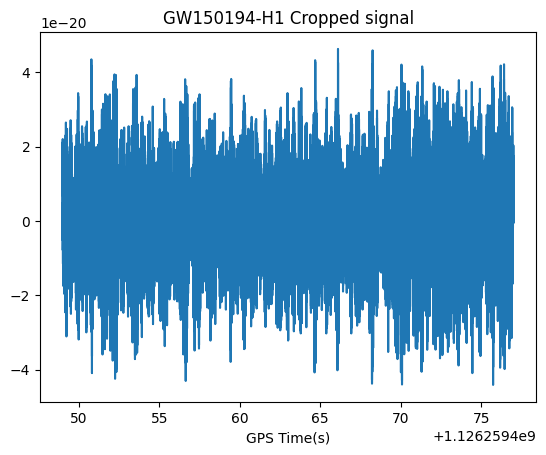

In [12]:
# Remove 2 seconds of data from both the beginning and end
cropped = strain_data.crop(2, 2)

pylab.plot(cropped.sample_times, cropped)
pylab.xlabel('GPS Time(s)')
pylab.title('GW150194-H1 Cropped signal')
pylab.show()

#### calculate the power spectral density

Optimal matched filtering requires weighting the frequency components of the potential signal and data by the noise amplitude. We can view this as filtering the data with the time series equivelant of 1 / PSD. To ensure that we can control how much applying this filter to the data, we window the time domain equivelant of the PSD to a specific length.

(30, 1024)

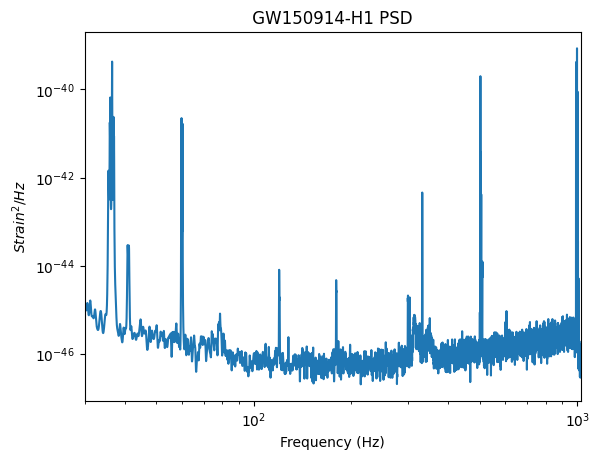

In [14]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
# Estimate the power spectral density
# We use 4 second samples.
psd = cropped.psd(4)

# interpolate the PSD to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner

psd = interpolate(psd, cropped.delta_f)

# 1/PSD will now act as a filter with an effective length of 4 seconds
psd = inverse_spectrum_truncation(psd, int(4 * cropped.sample_rate),
                                  low_frequency_cutoff=15) # the cutoff is to avoid low values as we highpassed the data before at threshold 15Hz

pylab.loglog(psd.sample_frequencies, psd)
pylab.ylabel('$Strain^2 / Hz$')
pylab.title(' GW150914-H1 PSD ')
pylab.xlabel('Frequency (Hz)')
pylab.xlim(30, 1024)

#**Creating the simulated signal**

In general, matched filtering involves laying the potential signal over your data and integrating (after weighting frequencies correctly). If there is a signal in the data that aligns with your 'simulated', you will get a large value when integrated over.

we already know our merger system, we then have the key parameters discussed above, and we'll use them now to build the model to simulate similar conditions to our system.

**Note**: since the masses the two compononets in the binary systems overlaps in the range of uncertainties we will be assuming equaly masses for both bodies. If this have shown some in accuracies we will adjust it, but in principal it shouldn't

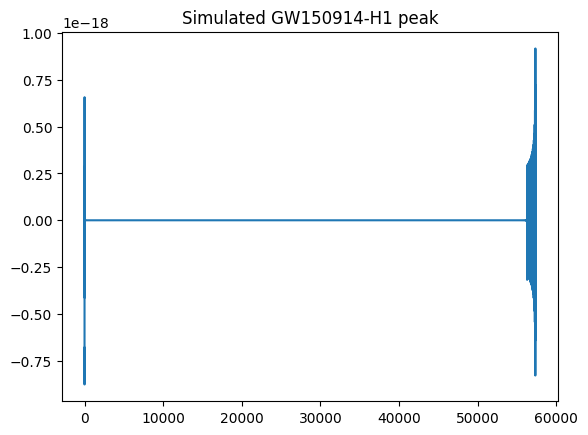

In [15]:
m = 39 # Solar masses
w_plus, w_cross = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=cropped.delta_t,
                     f_lower=20)

#  resize to match our data
w_plus.resize(len(cropped))

# The waveform begins at the start of the vector, so if we want the
# SNR time series to correspond to the approximate merger location
# we need to shift the data so that the merger is approximately at the
# first bin of the data.

# This function rotates the vector by a fixed amount of time.
# Note that time stamps are not affected, but the true
# position in the vector is.

# In our simulation we will be taking the plus polarization into account and see how accurate the results will be.
simulated = w_plus.cyclic_time_shift(w_plus.start_time)
pylab.plot(simulated)
pylab.title('Simulated GW150914-H1 peak')
pylab.show()

#### calculating the signal-to-noise time series

In this section we will calculate the signal-to-noise time series for our simulated.

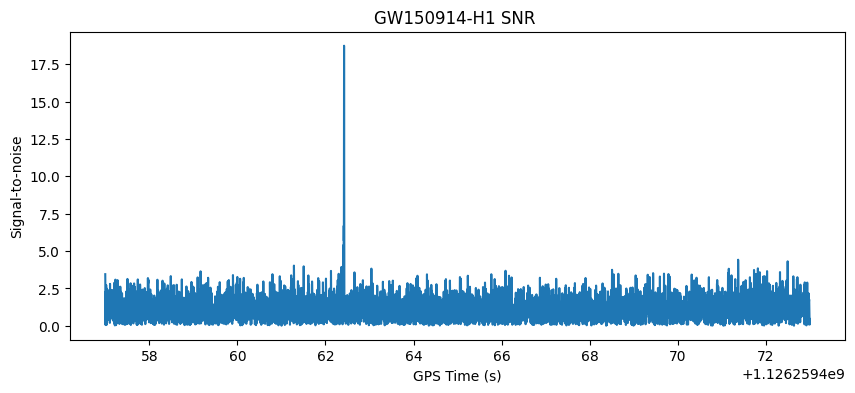

In [18]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(simulated, cropped,
                     psd=psd, low_frequency_cutoff=20)


# remove 4 seconds at the beginning and 4 seconds at the end to eliminate time corrupted by the simulated filter and psd filter:
snr = snr.crop(4 + 4, 4)
# plot the results:
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr)) # since the Matched filter returns complex number, we will take their real part to maximize over the phase signal
pylab.ylabel('Signal-to-noise')
pylab.title('GW150914-H1 SNR ')
pylab.xlabel('GPS Time (s)')
pylab.show()

# EXTRACT THE CHIRPING PEAK OF THE SIMULATED SIGNAL AND ITS TIME OF OCCURENCE
peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

# **Aligning and Subtracting the SIMULATED Signal**


After getrting our simulated chirping peak, we will use it to align our simulation to the original data of GW150914.

In [19]:
from pycbc.filter import sigma

# Shift our simulation to the time of the Chirping peak
dt = time - cropped.start_time
cohered = simulated.cyclic_time_shift(dt)

# scale the simulation to get SNR= 1 in this data
cohered /= sigma(cohered, psd=psd, low_frequency_cutoff=20.0)

# Scale the simulated amplitude and phase to the peak value
cohered = (cohered.to_frequencyseries() * snrp).to_timeseries()
cohered.start_time = cropped.start_time

#### **Overlap plot of the similation and the original data**

As we did in our analysis of the GW190817 and GW170817 systems, we will whiten both, the simulated signal and the original data, to highlight noise and then bandpass them to get the relavent frequency range that is contributing to the merger event only(30-300Hz).

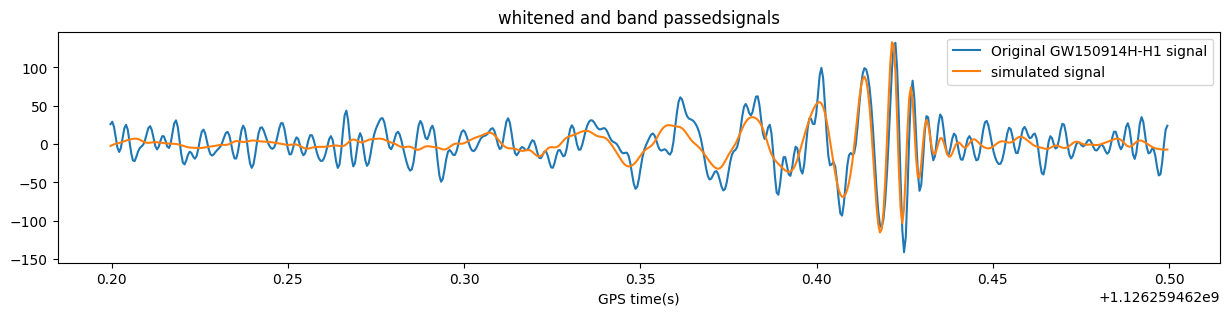

In [20]:
# whiten and band pass the data and simulation:
white_data = (cropped.to_frequencyseries() / psd**0.5).to_timeseries() # whiten the original data

# whiten the simulated signal
tapered = cohered.highpass_fir(30, 512, remove_corrupted=False)
white_simulated = (tapered.to_frequencyseries() / psd**0.5).to_timeseries()

white_data = white_data.highpass_fir(30., 512).lowpass_fir(300, 512) # bandpas original data
white_simulated = white_simulated.highpass_fir(30, 512).lowpass_fir(300, 512)  # band pass simulated data

# Select the time around the merger
white_data = white_data.time_slice(merger_system.time-.2, merger_system.time+.1) # whiten original data
white_simulated = white_simulated.time_slice(merger_system.time-.2, merger_system.time+.1) # whiten simulated data

pylab.figure(figsize=[15, 3])
pylab.plot(white_data.sample_times, white_data, label="Original GW150914H-H1 signal")
pylab.plot(white_simulated.sample_times, white_simulated, label="simulated signal")
pylab.title('whitened and band passedsignals')
pylab.xlabel('GPS time(s)')
pylab.legend()
pylab.show()

Notice that a considerable alignment between our simulation and the original data can bee seen at the time of the merger, and all that is left now is to extract our signal by subtracting the simulated chirping peak from the original data.

#### **Subtracting the signal from the data and spctrogram**

We will plot both the spectrogram of the original data before and after the  subtraction by our simulated signal to see how accurate our simulation is.

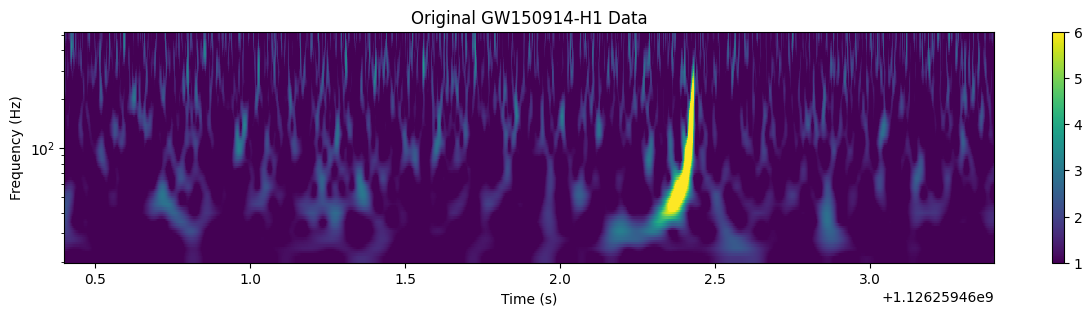

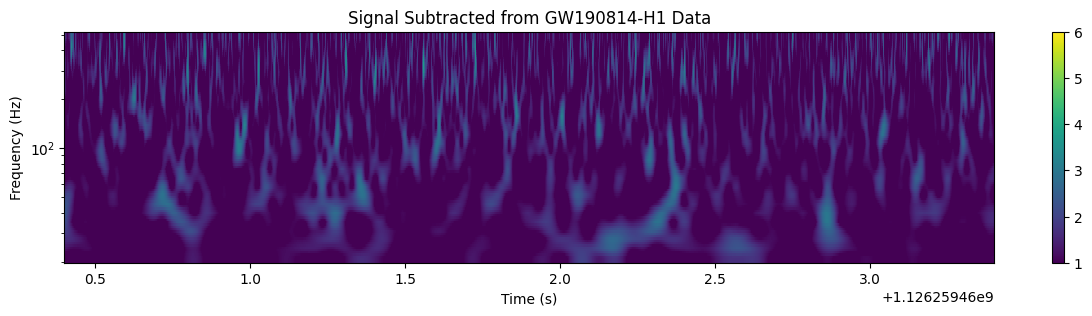

In [21]:
subtracted = cropped - cohered
# sim_chirping= cropped - subtracted
# Plot the original data and the subtracted signal data

for data, title in [(cropped, 'Original GW150914-H1 Data'),
                    (subtracted, 'Signal Subtracted from GW190814-H1 Data')]:

    t, f, p = data.whiten(4, 4).qtransform(.001,
                                                  logfsteps=100,
                                                  qrange=(8, 8),
                                                  frange=(20, 512))
    pylab.figure(figsize=[15, 3])
    pylab.title(title)
    pylab.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
    pylab.colorbar()
    pylab.yscale('log')
    pylab.xlabel('Time (s)')
    pylab.ylabel('Frequency (Hz)')
    pylab.xlim(merger_system.time - 2, merger_system.time + 1)
    pylab.show()

Notice that after the subtraction of the data from our simulated signal, the chirping peak have completely disappeared and is no longer visible. This is an indication that the chirping peak simulated by our model is very close to the initial data and we have succefully simulated a merging event similar to that of GW190814-H1